# Importing Data

Using Signal Ai's dataset of 1 million articles, we parsed through the articles by selecting various news publishers known for having biases towards left or right political beliefs. Using the received JSON file, we filtered for sources such that we get a population of approximately 2000 total articles, with 1000 having left-leaning bias and 1000 having right-leaning bias.

In [83]:
import pandas as pd
import json

file_path = '/Users/skim/VSCode/DIS Copenhagen/Computational Analysis of Big Data/Final Project/signalmedia-1m.jsonl'

left_sources = {"cnn", "the new york times", "vox.com", "msnbc", "buzzfeed", "the new yorker: news"}
right_sources = {"fox news", "breitbart.com", "theblaze.com - stories", "cbn.com - cbn news", "daily caller", "daily mail", "newsmax.com", "new york post", "the american conservative \u00bb daniel larison", "infowars", "redstate", "national review"}

left_rows = []
right_rows = []

with open(file_path, 'r') as file:
    for line in file:
        entry = json.loads(line)
        if entry.get('source', '').lower().strip() in left_sources:
            left_rows.append(entry)
        if entry.get('source', '').lower().strip() in right_sources:
            right_rows.append(entry)
        if len(left_rows) + len(right_rows) >= 3000:
            break

left_data = pd.DataFrame(left_rows)
left_data["label"] = 0 # 0 for left

right_data = pd.DataFrame(right_rows)
right_data["label"] = 1 # 1 for right

combined_data = pd.concat([left_data, right_data], ignore_index=True)

In [84]:
left_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1075 entries, 0 to 1074
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   id          1075 non-null   object
 1   content     1075 non-null   object
 2   title       1075 non-null   object
 3   media-type  1075 non-null   object
 4   source      1075 non-null   object
 5   published   1075 non-null   object
 6   label       1075 non-null   int64 
dtypes: int64(1), object(6)
memory usage: 58.9+ KB


In [85]:
right_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1098 entries, 0 to 1097
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   id          1098 non-null   object
 1   content     1098 non-null   object
 2   title       1098 non-null   object
 3   media-type  1098 non-null   object
 4   source      1098 non-null   object
 5   published   1098 non-null   object
 6   label       1098 non-null   int64 
dtypes: int64(1), object(6)
memory usage: 60.2+ KB


In [86]:
combined_data.head()

,id,content,title,media-type,source,published,label
0,693ae030-4239-4291-b248-dbf7c1696ff2,Georgia is set to execute its only woman on de...,Georgia Plans To Execute Its Only Woman On Dea...,News,BuzzFeed,2015-09-28T22:24:29Z,0
1,e7157bbf-6ad4-477d-a4e4-14a0bb9ad9f5,"Story highlights Family posts, ""We are devasta...",'Senseless loss of a beautiful life',News,CNN,2015-09-07T19:48:15Z,0
2,0ef6b514-620d-4e8a-9405-e390e16c6cd7,"Obama dropped in on ""The Late Show with Stephe...",Michelle Obama gives Stephen Colbert advice fo...,News,CNN,2015-09-29T10:33:00Z,0
3,96b993b2-320f-457a-bab2-6bc214c05013,"Story highlights Estonia, a neighbor of Russia...",U.S. stealth fighters visit Estonia,News,CNN,2015-09-07T18:09:09Z,0
4,c3a3224d-bae5-40e3-80f6-0ca74083beaf,Story highlights Swiss prosecutors open crimin...,FIFA boss Blatter facing criminal proceedings,News,CNN,2015-09-25T16:38:47Z,0


# Data Pre-processing

In [87]:
# STEP 1 TOKENIZE
import nltk
from nltk.tokenize import sent_tokenize, word_tokenize

test_text = combined_data.iloc[0]['content']
test_tokenized = word_tokenize(test_text)

print(test_tokenized)

['Georgia', 'is', 'set', 'to', 'execute', 'its', 'only', 'woman', 'on', 'death', 'row', 'Tuesday', 'evening', '.', 'If', 'all', 'goes', 'according', 'to', 'the', 'state', '’', 's', 'plan', ',', 'Kelly', 'Gissendaner', 'will', 'be', 'the', 'first', 'woman', 'the', 'state', 'has', 'executed', 'in', '70', 'years', '.', 'She', 'was', 'sentenced', 'to', 'death', 'in', '1998', 'for', 'plotting', 'the', 'death', 'of', 'her', 'husband', ',', 'Douglas', 'Gissendaner', ',', 'with', 'her', 'boyfriend', '.', 'Gissendaner', 'drove', 'her', 'boyfriend', ',', 'Gregory', 'Owen', ',', 'to', 'her', 'house', ',', 'gave', 'him', 'the', 'murder', 'weapons', '—', 'a', 'nightstick', 'and', 'a', 'hunting', 'knife', '—', 'and', 'then', 'went', 'to', 'a', 'nightclub', 'with', 'friends', ',', 'according', 'to', 'court', 'documents', '.', 'Owen', 'ambushed', 'Douglas', 'and', 'forced', 'him', 'to', 'drive', 'his', 'car', 'to', 'a', 'remote', 'location', 'that', 'Gissendaner', 'chose', 'beforehand', '.', 'Once', '

In [88]:
combined_data['text_tokenized'] = combined_data['content'].apply(word_tokenize)
combined_data.head()

,id,content,title,media-type,source,published,label,text_tokenized
0,693ae030-4239-4291-b248-dbf7c1696ff2,Georgia is set to execute its only woman on de...,Georgia Plans To Execute Its Only Woman On Dea...,News,BuzzFeed,2015-09-28T22:24:29Z,0,"[Georgia, is, set, to, execute, its, only, wom..."
1,e7157bbf-6ad4-477d-a4e4-14a0bb9ad9f5,"Story highlights Family posts, ""We are devasta...",'Senseless loss of a beautiful life',News,CNN,2015-09-07T19:48:15Z,0,"[Story, highlights, Family, posts, ,, ``, We, ..."
2,0ef6b514-620d-4e8a-9405-e390e16c6cd7,"Obama dropped in on ""The Late Show with Stephe...",Michelle Obama gives Stephen Colbert advice fo...,News,CNN,2015-09-29T10:33:00Z,0,"[Obama, dropped, in, on, ``, The, Late, Show, ..."
3,96b993b2-320f-457a-bab2-6bc214c05013,"Story highlights Estonia, a neighbor of Russia...",U.S. stealth fighters visit Estonia,News,CNN,2015-09-07T18:09:09Z,0,"[Story, highlights, Estonia, ,, a, neighbor, o..."
4,c3a3224d-bae5-40e3-80f6-0ca74083beaf,Story highlights Swiss prosecutors open crimin...,FIFA boss Blatter facing criminal proceedings,News,CNN,2015-09-25T16:38:47Z,0,"[Story, highlights, Swiss, prosecutors, open, ..."


In [89]:
# Filter out stopwords and non-alpha words
from nltk.corpus import stopwords

stop_words = set(stopwords.words("english"))

def filter_tokens(tokens):
    return [word for word in tokens if word.casefold() not in stop_words and word.isalpha()]

combined_data['text_tokenized_filtered'] = combined_data['text_tokenized'].apply(filter_tokens)

combined_data.head()

,id,content,title,media-type,source,published,label,text_tokenized,text_tokenized_filtered
0,693ae030-4239-4291-b248-dbf7c1696ff2,Georgia is set to execute its only woman on de...,Georgia Plans To Execute Its Only Woman On Dea...,News,BuzzFeed,2015-09-28T22:24:29Z,0,"[Georgia, is, set, to, execute, its, only, wom...","[Georgia, set, execute, woman, death, row, Tue..."
1,e7157bbf-6ad4-477d-a4e4-14a0bb9ad9f5,"Story highlights Family posts, ""We are devasta...",'Senseless loss of a beautiful life',News,CNN,2015-09-07T19:48:15Z,0,"[Story, highlights, Family, posts, ,, ``, We, ...","[Story, highlights, Family, posts, devastated,..."
2,0ef6b514-620d-4e8a-9405-e390e16c6cd7,"Obama dropped in on ""The Late Show with Stephe...",Michelle Obama gives Stephen Colbert advice fo...,News,CNN,2015-09-29T10:33:00Z,0,"[Obama, dropped, in, on, ``, The, Late, Show, ...","[Obama, dropped, Late, Show, Stephen, Colbert,..."
3,96b993b2-320f-457a-bab2-6bc214c05013,"Story highlights Estonia, a neighbor of Russia...",U.S. stealth fighters visit Estonia,News,CNN,2015-09-07T18:09:09Z,0,"[Story, highlights, Estonia, ,, a, neighbor, o...","[Story, highlights, Estonia, neighbor, Russia,..."
4,c3a3224d-bae5-40e3-80f6-0ca74083beaf,Story highlights Swiss prosecutors open crimin...,FIFA boss Blatter facing criminal proceedings,News,CNN,2015-09-25T16:38:47Z,0,"[Story, highlights, Swiss, prosecutors, open, ...","[Story, highlights, Swiss, prosecutors, open, ..."


In [90]:
combined_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2173 entries, 0 to 2172
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   id                       2173 non-null   object
 1   content                  2173 non-null   object
 2   title                    2173 non-null   object
 3   media-type               2173 non-null   object
 4   source                   2173 non-null   object
 5   published                2173 non-null   object
 6   label                    2173 non-null   int64 
 7   text_tokenized           2173 non-null   object
 8   text_tokenized_filtered  2173 non-null   object
dtypes: int64(1), object(8)
memory usage: 152.9+ KB


# Balance Classes

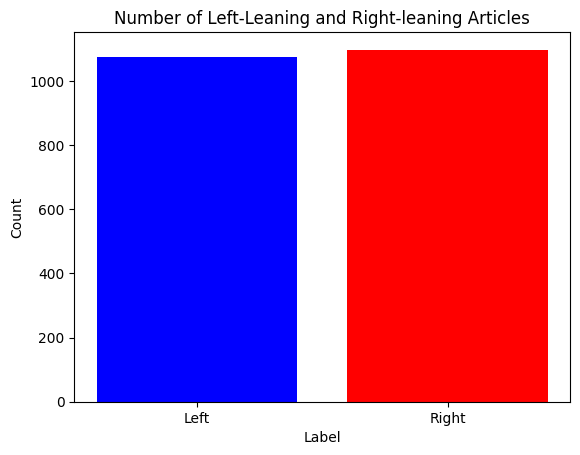

Total Right-Leaning Articles: 1098 (50.53%)
Total Left-Leaning Articles: 1075 (49.47%)


In [91]:
import matplotlib.pyplot as plt

# count occurances of right and left data and plot
right_count = combined_data[combined_data['label'] == 1].shape[0]
left_count = combined_data[combined_data['label'] == 0].shape[0]
total_articles = right_count + left_count

plt.bar(['Left', 'Right'], [left_count, right_count], color=['blue', 'red'])
plt.title('Number of Left-Leaning and Right-leaning Articles')
plt.xlabel('Label')
plt.ylabel('Count')
plt.show()

# Print totals and percentages
right_percentage = (right_count / total_articles) * 100
left_percentage = (left_count / total_articles) * 100
print(f"Total Right-Leaning Articles: {right_count} ({right_percentage:.2f}%)")
print(f"Total Left-Leaning Articles: {left_count} ({left_percentage:.2f}%)")

In [92]:
import random

# Randomly select the same number of right-leaning articles as left-leaning articles
right_data_subset = combined_data[combined_data['label'] == 1].sample(n=left_count, random_state=42)

# Combine the selected right-leaning data with the left-leaning data
combined_data = pd.concat([combined_data[combined_data['label'] == 0], right_data_subset], ignore_index=True)

# Display the distribution of the new balanced dataset
print(combined_data['label'].value_counts())

label
0    1075
1    1075
Name: count, dtype: int64


In [93]:
# Add a preprocessing step to convert all tokenized filtered words to lowercase
combined_data['text_tokenized_filtered'] = combined_data['text_tokenized_filtered'].apply(
    lambda x: [word.lower() for word in x]
)

# NOTE Delete code below - does not apply to signal ai dataset

# # Manually specify a set of stopwords that start with 'reuters'
# manual_stopwords = ['reuters', 'reuters.com', 'reutersnews', 'reutersnews.com']

# # Preprocessing step: Convert all tokenized filtered words to lowercase and remove stopwords
# combined_data['text_tokenized_filtered'] = combined_data['text_tokenized_filtered'].apply(
#     lambda x: [word.lower() for word in x if not any(word.startswith(stopword) for stopword in manual_stopwords)]
# )

# Data Visualization

Most common words and their frequencies:
said: 5697
one: 2388
hide: 2356
people: 2338
caption: 2327
would: 2319
new: 2006
also: 1814
trump: 1722
like: 1694
first: 1443
clinton: 1368
time: 1348
two: 1228
president: 1212
could: 1204
told: 1173
get: 1103
last: 1098
many: 1089
years: 1087
state: 1085
even: 1083
year: 1076
view: 1055
world: 1044
obama: 1034
pope: 1004
image: 984
says: 977
states: 967
united: 948
back: 934
police: 928
make: 914
news: 905
think: 903
day: 886
government: 885
way: 871
know: 861
francis: 854
us: 850
going: 846
say: 828
percent: 818
house: 802
according: 798
may: 797
cnn: 797
life: 791
take: 779
see: 779
republican: 777
refugees: 769
made: 767
since: 757
want: 752
right: 750
country: 745
show: 742
isis: 738
week: 729
much: 723
still: 714
story: 711
women: 709
syria: 699
next: 687
work: 686
best: 679
go: 671
september: 668
need: 654
city: 652
another: 647
bush: 644
well: 642
good: 642
campaign: 634
family: 633
three: 630
former: 617
presidential: 613
national: 601

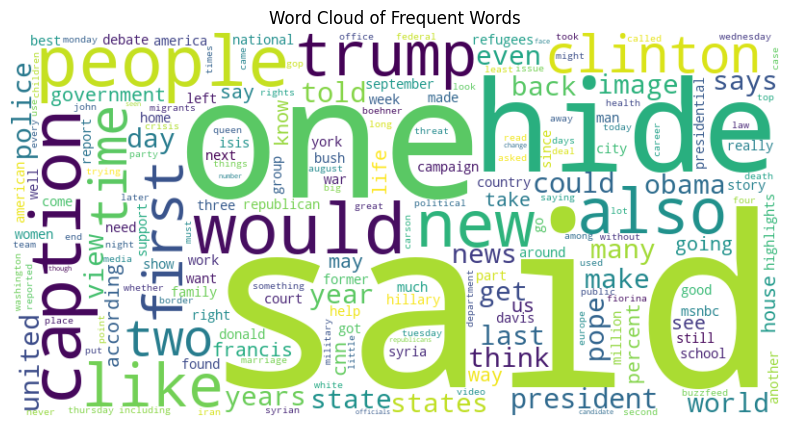

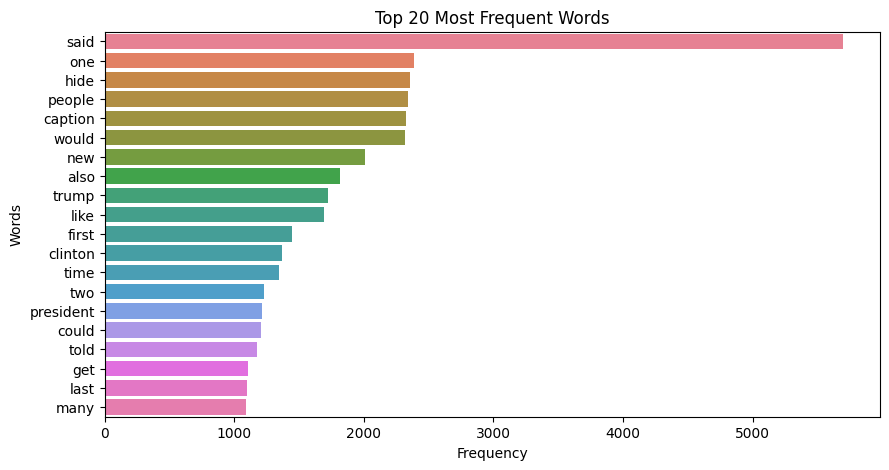

Average number of words per entry: 267.45


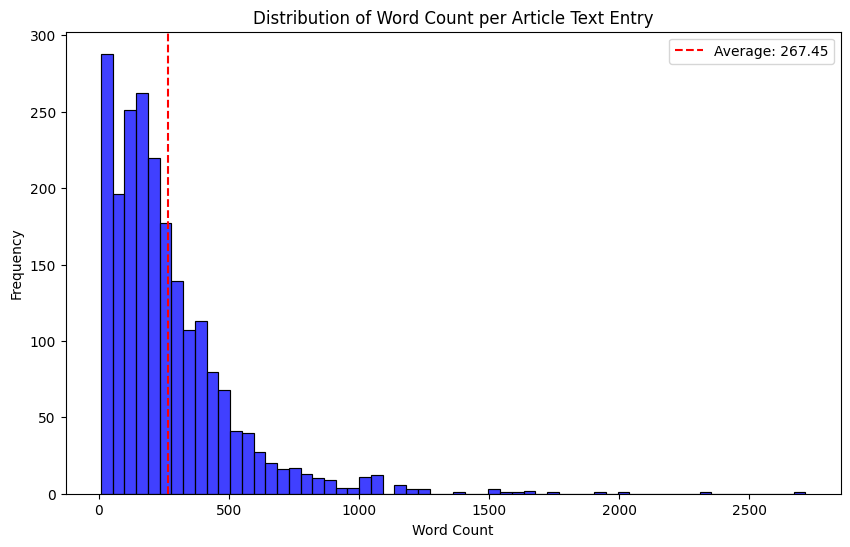

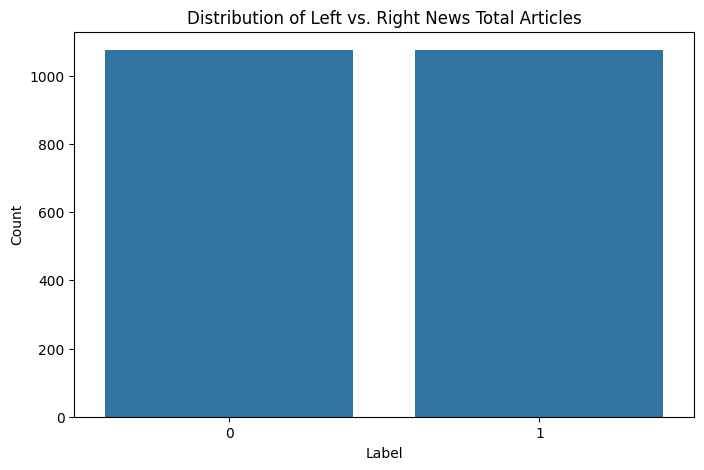

In [94]:
import seaborn as sns
from collections import Counter
from wordcloud import WordCloud
import numpy as np

# Assuming combined_data contains 'text_tokenized_filtered' and 'label'

# 1. Word Frequency Analysis
# Flatten the list of tokenized words and count the occurrences of each word
all_words = [word for tokens in combined_data['text_tokenized_filtered'] for word in tokens]
word_counts = Counter(all_words)

# Most common words
most_common_words = word_counts.most_common(100)
print("Most common words and their frequencies:")
for word, count in most_common_words:
    print(f"{word}: {count}")

# 2. Word Cloud Visualization
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_counts)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Word Cloud of Frequent Words")
plt.show()

# 3. Frequency Distribution of Words
# Plot the top 20 most frequent words
top_words = word_counts.most_common(20)
words, counts = zip(*top_words)
plt.figure(figsize=(10, 5))
sns.barplot(x=list(counts), y=list(words), hue=list(words), legend=False)
plt.title('Top 20 Most Frequent Words')
plt.xlabel('Frequency')
plt.ylabel('Words')
plt.show()

# 4. Average Number of Words per Text Entry
word_counts_per_entry = combined_data['text_tokenized_filtered'].apply(len)
avg_words_per_entry = word_counts_per_entry.mean()
print(f"Average number of words per entry: {avg_words_per_entry:.2f}")

# 5. Text Length Distribution (Word Count)
plt.figure(figsize=(10, 6))
sns.histplot(word_counts_per_entry, bins=60, color='blue')
plt.title('Distribution of Word Count per Article Text Entry')
plt.axvline(avg_words_per_entry, color='red', linestyle='--', label=f'Average: {avg_words_per_entry:.2f}')
plt.legend()
plt.xlabel('Word Count')
plt.ylabel('Frequency')
plt.show()

# NOTE this just shows that the number of articles on each side is the same which seems unnecessary - delete

# 8. Sentiment Distribution (if label represents sentiment)
# If labels are binary (0 and 1), you can plot the sentiment distribution
plt.figure(figsize=(8, 5))
sns.countplot(x='label', data=combined_data)
plt.title('Distribution of Left vs. Right News Total Articles')
plt.xlabel('Label')
plt.ylabel('Count')
plt.show()

# Statistical Analysis

In [95]:
# Separate the data into left (label=1) and right (label=0) articles
left_articles = combined_data[combined_data['label'] == 1]
right_articles = combined_data[combined_data['label'] == 0]

# Flatten the tokenized words for left articles and right articles
left_biased_words = [word for tokens in left_articles['text_tokenized_filtered'] for word in tokens]
right_biased_words = [word for tokens in right_articles['text_tokenized_filtered'] for word in tokens]

# Count word frequencies for both left and right articles
left_biased_word_counts = Counter(left_biased_words)
right_biased_word_counts = Counter(right_biased_words)

# Get the most common words for left and right articles (top 250)
most_common_left_words = left_biased_word_counts.most_common(250)
most_common_right_words = right_biased_word_counts.most_common(250)

# Print the most common words for left articles
print("Most common words in left-leaning articles:")
for word, count in most_common_left_words:
    print(f"{word}: {count}")

# Print the most common words for right articles
print("\nMost common words in right-leaning articles:")
for word, count in most_common_right_words:
    print(f"{word}: {count}")

Most common words in left-leaning articles:
said: 2290
would: 1118
one: 1061
people: 965
new: 932
trump: 900
also: 760
percent: 752
like: 701
president: 598
obama: 593
state: 589
time: 585
first: 559
two: 551
even: 518
last: 509
news: 506
could: 503
get: 500
told: 483
year: 468
years: 461
think: 457
clinton: 452
many: 451
government: 446
going: 441
us: 425
back: 407
according: 397
republican: 390
police: 386
make: 385
way: 382
know: 377
right: 366
say: 364
says: 360
states: 360
want: 357
need: 351
since: 350
may: 346
house: 343
much: 342
day: 338
week: 337
take: 336
well: 335
world: 326
made: 325
presidential: 320
donald: 316
good: 310
still: 308
see: 304
three: 302
united: 294
school: 290
go: 288
another: 287
federal: 286
pope: 282
country: 278
national: 277
support: 272
work: 270
york: 270
deal: 268
white: 268
america: 267
read: 266
american: 262
rights: 260
campaign: 260
debate: 255
report: 255
help: 252
women: 252
political: 251
never: 250
former: 250
law: 249
every: 249
follow: 24

In [96]:
# Convert the most common words into sets for easy comparison
left_biased_words_set = set([word for word, _ in most_common_left_words])
right_biased_words_set = set([word for word, _ in most_common_right_words])

# Find words that appear in left articles but not in right articles
unique_left_words = left_biased_words_set - right_biased_words_set

# Find words that appear in right articles but not in left articles
unique_right_words = right_biased_words_set - left_biased_words_set

# Print the unique words that could lean towards being left or right
print("Words that may lean towards an article being LEFT-LEANING:")
for word in unique_left_words:
    print(word)

print("\nWords that may lean towards an article being RIGHT-LEANING:")
for word in unique_right_words:
    print(word)

Words that may lean towards an article being LEFT-LEANING:
meeting
earlier
past
gay
problem
less
rubio
current
immigration
federal
follow
yet
company
muslim
conservative
black
question
ago
business
program
stories
believe
congress
become
run
game
economic
service
email
real
daily
republicans
keep
content
voters
candidate
season
give
went
must
money
department
general
plan
twitter
important
poll
americans
democratic
percent
post
fact
job
reported
texas
policy
free
online
planned
democrats
months
however
market
times
bill
month
vote
tax
thing
already
share
win
parenthood
large
several
rights
better

Words that may lean towards an article being RIGHT-LEANING:
isis
open
nations
seen
taking
threat
death
terror
woman
rover
wrote
august
caption
food
set
find
iraq
history
syria
water
center
boehner
far
men
photos
image
taken
mother
international
military
different
highlights
war
china
refugee
april
syrian
germany
civil
pictures
statement
south
ii
hungary
check
kim
young
crisis
russia
articles


In [97]:
combined_data.iloc[0]['text_tokenized_filtered']

['georgia',
 'set',
 'execute',
 'woman',
 'death',
 'row',
 'tuesday',
 'evening',
 'goes',
 'according',
 'state',
 'plan',
 'kelly',
 'gissendaner',
 'first',
 'woman',
 'state',
 'executed',
 'years',
 'sentenced',
 'death',
 'plotting',
 'death',
 'husband',
 'douglas',
 'gissendaner',
 'boyfriend',
 'gissendaner',
 'drove',
 'boyfriend',
 'gregory',
 'owen',
 'house',
 'gave',
 'murder',
 'weapons',
 'nightstick',
 'hunting',
 'knife',
 'went',
 'nightclub',
 'friends',
 'according',
 'court',
 'documents',
 'owen',
 'ambushed',
 'douglas',
 'forced',
 'drive',
 'car',
 'remote',
 'location',
 'gissendaner',
 'chose',
 'beforehand',
 'arrived',
 'owen',
 'beat',
 'douglas',
 'stabbed',
 'owen',
 'took',
 'douglas',
 'wedding',
 'ring',
 'watch',
 'make',
 'look',
 'like',
 'robbery',
 'gissendaner',
 'later',
 'arrived',
 'scene',
 'helped',
 'boyfriend',
 'burn',
 'husband',
 'body',
 'car',
 'law',
 'enforcement',
 'unable',
 'find',
 'douglas',
 'body',
 'weeks',
 'owen',
 'ac

In [98]:
combined_data['text_tokenized_filtered']

0       [georgia, set, execute, woman, death, row, tue...
1       [story, highlights, family, posts, devastated,...
2       [obama, dropped, late, show, stephen, colbert,...
3       [story, highlights, estonia, neighbor, russia,...
4       [story, highlights, swiss, prosecutors, open, ...
                              ...                        
2145    [make, invisible, national, suicide, preventio...
2146    [address, un, monday, russian, president, vlad...
2147    [dramatic, split, following, public, fight, ac...
2148    [supporters, democrat, presidential, contender...
2149    [statepoint, unlike, home, improvements, windo...
Name: text_tokenized_filtered, Length: 2150, dtype: object

In [99]:
# NOTE Below is the implemented version of Solomon's statistal analysis processes. Figured I'd leave the original word visualization just in case - feel free to delete the original if its unnecessary and/or inconsistent
import spacy

spacy.cli.download('en_core_web_sm')
NER = spacy.load("en_core_web_sm")

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 11.5 MB/s eta 0:00:00a 0:00:01
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [101]:
# Randomly sample 1000 right and 1000 left articles
# sampled_right = combined_data[combined_data['label'] == 1].sample(1000, random_state=42)
# sampled_left = combined_data[combined_data['label'] == 0].sample(1000, random_state=42)

sampled_data = pd.concat([right_articles, left_articles]).reset_index(drop=True)

In [102]:
# Function to count locations and people
def count_entities(text):
    doc = NER(" ".join(text))
    people = sum(1 for ent in doc.ents if ent.label_ == "PERSON")
    locations = sum(1 for ent in doc.ents if ent.label_ == "GPE")
    return people, locations

entity_counts = sampled_data['text_tokenized_filtered'].apply(count_entities)

sampled_data['person_count'] = [count[0] for count in entity_counts]
sampled_data['location_count'] = [count[1] for count in entity_counts]

sampled_data.head()

,id,content,title,media-type,source,published,label,text_tokenized,text_tokenized_filtered,person_count,location_count
0,693ae030-4239-4291-b248-dbf7c1696ff2,Georgia is set to execute its only woman on de...,Georgia Plans To Execute Its Only Woman On Dea...,News,BuzzFeed,2015-09-28T22:24:29Z,0,"[Georgia, is, set, to, execute, its, only, wom...","[georgia, set, execute, woman, death, row, tue...",7,7
1,e7157bbf-6ad4-477d-a4e4-14a0bb9ad9f5,"Story highlights Family posts, ""We are devasta...",'Senseless loss of a beautiful life',News,CNN,2015-09-07T19:48:15Z,0,"[Story, highlights, Family, posts, ,, ``, We, ...","[story, highlights, family, posts, devastated,...",3,6
2,0ef6b514-620d-4e8a-9405-e390e16c6cd7,"Obama dropped in on ""The Late Show with Stephe...",Michelle Obama gives Stephen Colbert advice fo...,News,CNN,2015-09-29T10:33:00Z,0,"[Obama, dropped, in, on, ``, The, Late, Show, ...","[obama, dropped, late, show, stephen, colbert,...",6,1
3,96b993b2-320f-457a-bab2-6bc214c05013,"Story highlights Estonia, a neighbor of Russia...",U.S. stealth fighters visit Estonia,News,CNN,2015-09-07T18:09:09Z,0,"[Story, highlights, Estonia, ,, a, neighbor, o...","[story, highlights, estonia, neighbor, russia,...",3,8
4,c3a3224d-bae5-40e3-80f6-0ca74083beaf,Story highlights Swiss prosecutors open crimin...,FIFA boss Blatter facing criminal proceedings,News,CNN,2015-09-25T16:38:47Z,0,"[Story, highlights, Swiss, prosecutors, open, ...","[story, highlights, swiss, prosecutors, open, ...",10,6


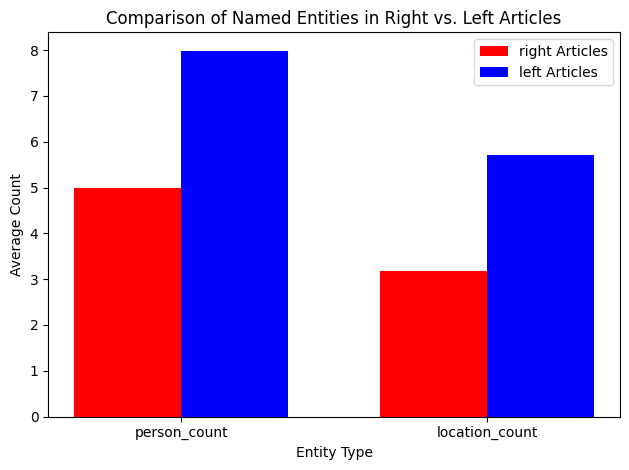

In [103]:
right_stats = sampled_data[sampled_data['label'] == 1][['person_count', 'location_count']].mean()
left_stats = sampled_data[sampled_data['label'] == 0][['person_count', 'location_count']].mean()

categories = ['person_count', 'location_count']
right_means = [right_stats[cat] for cat in categories]
left_means = [left_stats[cat] for cat in categories]


x = np.arange(len(categories))
width = 0.35
fig, ax = plt.subplots()
ax.bar(x - width/2, right_means, width, label='right Articles', color='red')
ax.bar(x + width/2, left_means, width, label='left Articles', color='blue')
ax.set_xlabel('Entity Type')
ax.set_ylabel('Average Count')
ax.set_title('Comparison of Named Entities in Right vs. Left Articles')
ax.set_xticks(x)
ax.set_xticklabels(categories)
ax.legend()
plt.tight_layout()
plt.show()

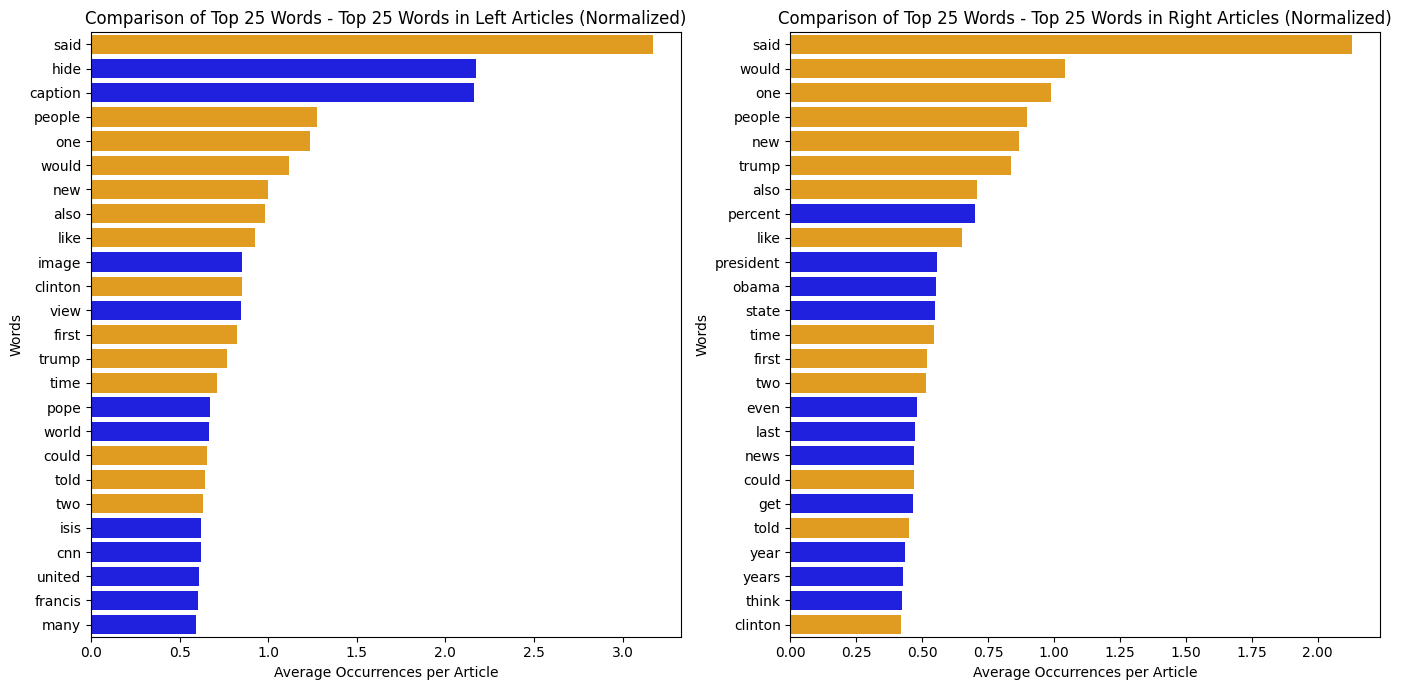

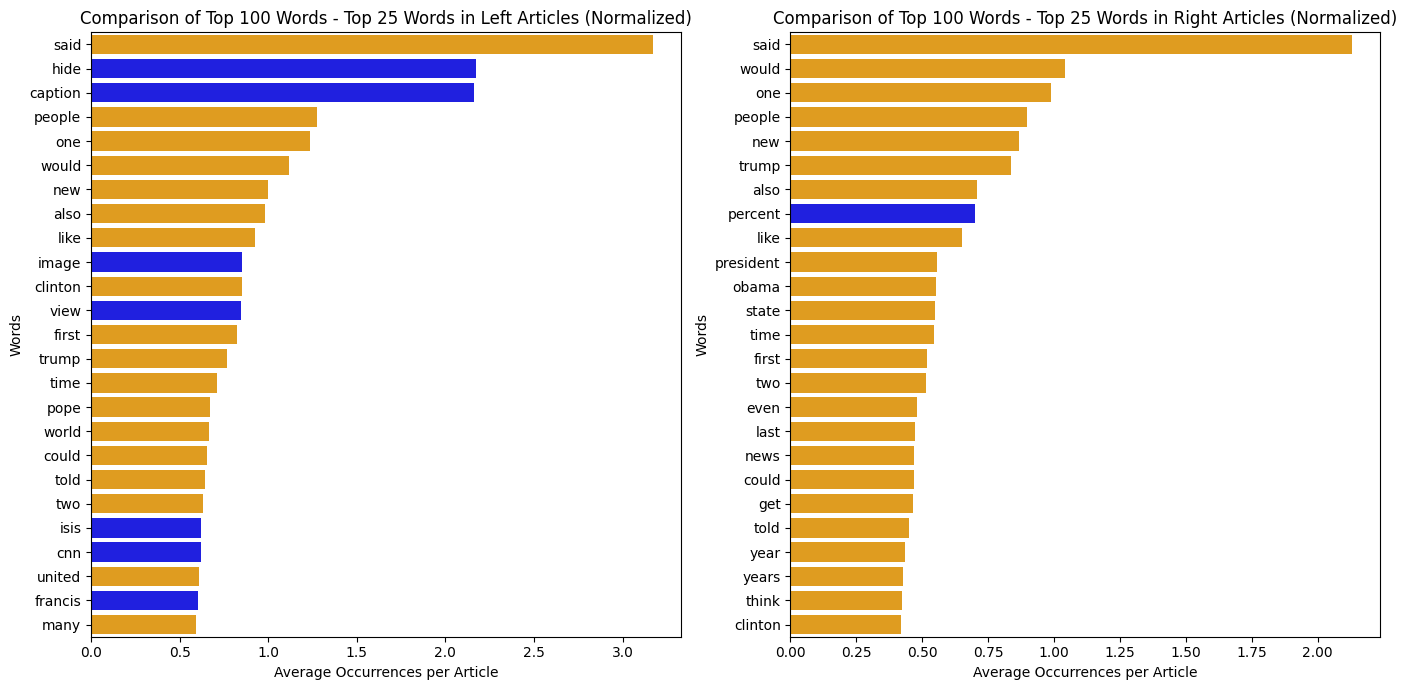

In [104]:
# Separate tokenized words by label then find top 25/top 100. find intersection of sets for overlap and graph
left_words = [word for tokens in combined_data[combined_data['label'] == 0]['text_tokenized_filtered'] for word in tokens]
right_words = [word for tokens in combined_data[combined_data['label'] == 1]['text_tokenized_filtered'] for word in tokens]

left_word_counts = Counter(left_words)
right_word_counts = Counter(right_words)


def graph_common_words(num_depth, base_title):
    left_top_25 = left_word_counts.most_common(num_depth)
    right_top_25 = right_word_counts.most_common(num_depth)
    
    left_top_25_dict = dict(left_top_25)
    right_top_25_dict = dict(right_top_25)
    
    common_words = set(left_top_25_dict.keys()).intersection(right_top_25_dict.keys())
    
    def prepare_data_for_plot(top_words, common_words):
        words, counts, colors = [], [], []
        for word, count in top_words:
            words.append(word)
            counts.append(count)
            colors.append('orange' if word in common_words else 'blue')
        return words, counts, colors
    
    # graph by average number of occurances per article
    def average_word_occurrence(word_counts, num_articles):
        return {word: count / num_articles for word, count in word_counts.items()}
    
    left_article_count = len(combined_data[combined_data['label'] == 0])
    right_article_count = len(combined_data[combined_data['label'] == 1])
    
    left_avg_word_occurrence = average_word_occurrence(left_word_counts, left_article_count)
    right_avg_word_occurrence = average_word_occurrence(right_word_counts, right_article_count)
    
    left_top_25_avg = sorted(left_avg_word_occurrence.items(), key=lambda x: x[1], reverse=True)[:25]
    right_top_25_avg = sorted(right_avg_word_occurrence.items(), key=lambda x: x[1], reverse=True)[:25]
    
    left_words_avg, left_counts_avg, left_colors = prepare_data_for_plot(left_top_25_avg, common_words)
    right_words_avg, right_counts_avg, right_colors = prepare_data_for_plot(right_top_25_avg, common_words)
    
    
    plt.figure(figsize=(14, 7))
    plt.subplot(1, 2, 1)
    sns.barplot(x=left_counts_avg, y=left_words_avg, hue=left_words_avg, palette=left_colors, legend=False)
    plt.title(base_title + ' - Top 25 Words in Left Articles (Normalized)')
    plt.xlabel('Average Occurrences per Article')
    plt.ylabel('Words')
    
    plt.subplot(1, 2, 2)
    sns.barplot(x=right_counts_avg, y=right_words_avg, hue=right_words_avg, palette=right_colors, legend=False)
    plt.title(base_title + ' - Top 25 Words in Right Articles (Normalized)')
    plt.xlabel('Average Occurrences per Article')
    plt.ylabel('Words')
    plt.tight_layout()
    plt.show()


graph_common_words(25, "Comparison of Top 25 Words")
graph_common_words(100, "Comparison of Top 100 Words")

# Create Logistic Regression Model

In [105]:
from gensim.models import Word2Vec
import scipy.linalg
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Step 1: Train Word2Vec model
tokenized_texts = combined_data['text_tokenized_filtered']

# Train Word2Vec
EMBEDDING_DIM = 100  # Size of Word2Vec embeddings
w2v_model = Word2Vec(sentences=tokenized_texts, vector_size=EMBEDDING_DIM, window=5, min_count=1, workers=4)

# Step 2: Create document embeddings
def document_embedding(tokens, model):
    """Compute document embedding by averaging word embeddings."""
    embeddings = [model.wv[word] for word in tokens if word in model.wv]
    if embeddings:
        return np.mean(embeddings, axis=0)
    else:
        return np.zeros(EMBEDDING_DIM)

# Generate embeddings for each document
document_embeddings = np.array([document_embedding(doc, w2v_model) for doc in tokenized_texts])

# Step 3: Prepare labels and split data
y = combined_data['label'].values
X_train, X_test, y_train, y_test = train_test_split(document_embeddings, y, test_size=0.2, random_state=42)

# Step 4: Train logistic regression model
logistic_model = LogisticRegression(max_iter=1000)
logistic_model.fit(X_train, y_train)

# Step 5: Evaluate the model
y_pred = logistic_model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


Accuracy: 0.6930232558139535
              precision    recall  f1-score   support

           0       0.73      0.59      0.65       211
           1       0.67      0.79      0.72       219

    accuracy                           0.69       430
   macro avg       0.70      0.69      0.69       430
weighted avg       0.70      0.69      0.69       430



# Testing on Fake vs. True Datasets

## New Dataset Fake vs. True

In [106]:
# Download latest version
path = kagglehub.dataset_download("saurabhshahane/fake-news-classification")

print("Path to dataset files:", path)

Path to dataset files: /Users/skim/.cache/kagglehub/datasets/saurabhshahane/fake-news-classification/versions/77


In [107]:
df = pd.read_csv('/Users/skim/VSCode/DIS Copenhagen/Computational Analysis of Big Data/Final Project/WELFake_Dataset.csv')

# Data Pre-processing

In [108]:
df = df.dropna(subset=['text'])  # Drop rows with null values in 'text' column
df = df.drop(columns=['Unnamed: 0'])  

In [109]:
true_data = df[df['label'] == 0]
fake_data = df[df['label'] == 1]

print(true_data['label'].value_counts())
print(fake_data['label'].value_counts())

label
0    35028
Name: count, dtype: int64
label
1    37067
Name: count, dtype: int64


In [110]:
combined_lengths = pd.concat([true_data['text'].apply(len), fake_data['text'].apply(len)])
percentile_2 = combined_lengths.quantile(0.02)
percentile_98 = combined_lengths.quantile(0.98)

# filter out the short and long
true_data_filtered = true_data[(true_data['text'].apply(len) >= percentile_2) & (true_data['text'].apply(len) <= percentile_98)]
fake_data_filtered = fake_data[(fake_data['text'].apply(len) >= percentile_2) & (fake_data['text'].apply(len) <= percentile_98)]

avg_filtered_true_length = true_data_filtered['text'].apply(len).mean()
avg_filtered_fake_length = fake_data_filtered['text'].apply(len).mean()


print(f"True data filtered count: {len(true_data_filtered)}, removed {len(true_data) - len(true_data_filtered)} articles.")
print(f"Fake data filtered count: {len(fake_data_filtered)}, removed {len(fake_data) - len(fake_data_filtered)} articles.\n")

print(f"Average length of filtered true articles: {avg_filtered_true_length}")
print(f"Average length of filtered fake articles: {avg_filtered_fake_length}\n")

print(f"Removed short articles below 2nd percentile of length < {percentile_2:.0f} characters.")
print(f"Removed long articles above 98th percentile of length > {percentile_98:.0f} characters.")

True data filtered count: 34433, removed 595 articles.
Fake data filtered count: 34789, removed 2278 articles.

Average length of filtered true articles: 3245.044492202248
Average length of filtered fake articles: 2714.814337865417

Removed short articles below 2nd percentile of length < 85 characters.
Removed long articles above 98th percentile of length > 12067 characters.


In [111]:
combined_df = pd.concat([true_data_filtered, fake_data_filtered])
combined_df

,title,text,label
3,"Bobby Jindal, raised Hindu, uses story of Chri...",A dozen politically active pastors came here f...,0
11,"May Brexit offer would hurt, cost EU citizens ...",BRUSSELS (Reuters) - British Prime Minister Th...,0
12,Schumer calls on Trump to appoint official to ...,"WASHINGTON (Reuters) - Charles Schumer, the to...",0
14,No Change Expected for ESPN Political Agenda D...,As more and more sports fans turn off ESPN to ...,0
15,Billionaire Odebrecht in Brazil scandal releas...,RIO DE JANEIRO/SAO PAULO (Reuters) - Billionai...,0
...,...,...,...
72121,Florida Judge Blames Rape Victim For Attendin...,The Ultra Music Festival in Miami is one of th...,1
72127,WIKILEAKS EMAIL SHOWS CLINTON FOUNDATION FUNDS...,An email released by WikiLeaks on Sunday appea...,1
72128,JUDGE JEANINE SOUNDS FREE SPEECH ALARM: “They ...,Judge Jeanine lets it rip! She s concerned wit...,1
72130,WATCH: Giuliani Demands That Democrats Apolog...,"You know, because in fantasyland Republicans n...",1


We did a lot of exploration and attempts at removing the location and source from the start of true articles but we were not able to find an elegant way to do this and preserve the data well enough with all the possibilities for how this information was presented. thus we decided just to remove the first word if it is all caps and remove the mentioned news sources at the start

In [112]:
def preprocess_text(text):
    # Remove bolded location patterns, including:
    # - Single or multi-location with slashes (e.g., "LOCATION/LOCATION")
    # - Locations with states or abbreviations (e.g., "CAPE CANAVERAL, Fla")
    # - Locations followed by "(Reuters)", "(AP)", "—", or similar
    #text = re.sub(r"^[A-Z][A-Z\s,./]+(?:[A-Z][a-z]+)?(?: \(Reuters\)| \(CNN\)| \(AP\)|—|–)\s*-*\s*", "", text)
    
    # Handle cases where abbreviations (e.g., "CHARLESTON, S") leave trailing letters
    #text = re.sub(r"^[A-Z][A-Z\s,]+[A-Z]\s*-*\s*", "", text)

    # Remove all occurrences of "Reuters", "CNN", "IPR", or "AP" in the text
    text = text.replace("Reuters", "").replace("CNN", "").replace("AP", "").replace("IPR", "")

    # Additional regex for new edge cases
    #text = re.sub(r"^\([A-Z]+\)\s*", "", text)  # Handle cases like "(REUTERS)"
    #text = re.sub(r"^[A-Z]+-[A-Z]+,\s+[A-Z]\s*-*\s*", "", text)  # Handle cases like "WINSTON-SALEM, N"

    words = text.split()

    # Check if the second word is also uppercase and remove the first two words
    if len(words) > 1 and words[0].isupper() and words[1].isupper():
        words = words[2:]  # Remove the first two words
    
    # Check if the first word is uppercase, and if so, remove it
    if words and words[0].isupper():
        words = words[1:]  # Remove the first word

    # Reassemble the text
    return ' '.join(words).strip()
    
    return text.strip()


def preprocess_first_sentence(text):
    first_sentence = text.split('.')[0]  # Extract the first sentence
    rest_of_text = text[len(first_sentence):]  # Get the rest of the text after the first sentence
    preprocessed_first_sentence = preprocess_text(first_sentence)  # Apply preprocessing to the first sentence
    
    # Return full text
    return preprocessed_first_sentence + rest_of_text

In [113]:
# apply preprocessing to true data only and then combine with fake data
true_data_filtered.loc[:, 'text'] = true_data_filtered['text'].apply(preprocess_first_sentence)

df = pd.concat([true_data_filtered, fake_data_filtered])

df

,title,text,label
3,"Bobby Jindal, raised Hindu, uses story of Chri...",dozen politically active pastors came here for...,0
11,"May Brexit offer would hurt, cost EU citizens ...",() - British Prime Minister Theresa May s offe...,0
12,Schumer calls on Trump to appoint official to ...,"() - Charles Schumer, the top Democrat in the ...",0
14,No Change Expected for ESPN Political Agenda D...,As more and more sports fans turn off ESPN to ...,0
15,Billionaire Odebrecht in Brazil scandal releas...,"PAULO () - Billionaire Marcelo Odebrecht, the ...",0
...,...,...,...
72121,Florida Judge Blames Rape Victim For Attendin...,The Ultra Music Festival in Miami is one of th...,1
72127,WIKILEAKS EMAIL SHOWS CLINTON FOUNDATION FUNDS...,An email released by WikiLeaks on Sunday appea...,1
72128,JUDGE JEANINE SOUNDS FREE SPEECH ALARM: “They ...,Judge Jeanine lets it rip! She s concerned wit...,1
72130,WATCH: Giuliani Demands That Democrats Apolog...,"You know, because in fantasyland Republicans n...",1


We can see now compared to the combined_df above that for most cases the location and news source are removed correctly and the rest of the text is not altered with in a way that would affect the filtered tokens we will make later on

In [114]:
duplicates = df[df.duplicated(subset=['text'])]

true_duplicates_count = duplicates[duplicates['label'] == 0].shape[0]
fake_duplicates_count = duplicates[duplicates['label'] == 1].shape[0]

df = df[~df.duplicated(subset=['text'])]

print(f"Number of duplicate entries removed: {len(duplicates)}")
print(f"Number of duplicates from true articles: {true_duplicates_count}")
print(f"Number of duplicates from fake articles: {fake_duplicates_count}")

Number of duplicate entries removed: 8182
Number of duplicates from true articles: 368
Number of duplicates from fake articles: 7814


## Tokenize text

In [115]:
df = df.copy()
df['text_tokenized'] = df['text'].apply(word_tokenize)

## Filter stopwords

In [116]:
# filter for stopwords and non-words into new column 'text_tokenized_filtered'
stop_words = set(stopwords.words("english"))

def filter_tokens(tokens):
    return [word for word in tokens if word.casefold() not in stop_words and word.isalpha()]

df['text_tokenized_filtered'] = df['text_tokenized'].apply(filter_tokens)
df['text_tokenized_filtered'] = df['text_tokenized_filtered'].apply(lambda x: [word.lower() for word in x])

## Balance Classes

In [117]:
# count occurances of fake and true data and plot
fake_count = df[df['label'] == 1].shape[0]
real_count = df[df['label'] == 0].shape[0]
total_articles = fake_count + real_count

In [118]:
true_articles = df[df['label'] == 0]
fake_articles = df[df['label'] == 1]

real_count = len(fake_articles)
real_articles_sampled = true_articles.sample(n=real_count, random_state=42)

balanced_df = pd.concat([real_articles_sampled, fake_articles])
print(balanced_df['label'].value_counts())

label
0    26975
1    26975
Name: count, dtype: int64


# Statistical Analysis

In [119]:
# copying code from earlier dataset 
combined_data_FT = balanced_df

In [120]:
spacy.cli.download('en_core_web_sm')
NER = spacy.load("en_core_web_sm")

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 11.4 MB/s eta 0:00:00a 0:00:01
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [121]:
# Randomly sample 5000 fake and 5000 true articles
sampled_fake = combined_data_FT[combined_data_FT['label'] == 1].sample(5000, random_state=42)
sampled_true = combined_data_FT[combined_data_FT['label'] == 0].sample(5000, random_state=42)

sampled_data = pd.concat([sampled_fake, sampled_true]).reset_index(drop=True)

In [122]:
# Function to count locations and people
def count_entities(text):
    doc = NER(" ".join(text))
    people = sum(1 for ent in doc.ents if ent.label_ == "PERSON")
    locations = sum(1 for ent in doc.ents if ent.label_ == "GPE")
    return people, locations

entity_counts = sampled_data['text_tokenized_filtered'].apply(count_entities)

sampled_data['person_count'] = [count[0] for count in entity_counts]
sampled_data['location_count'] = [count[1] for count in entity_counts]

sampled_data.head()

,title,text,label,text_tokenized,text_tokenized_filtered,person_count,location_count
0,Woman Arrested For DWI Has Jaw-Droppingly Stu...,"The cops should leave this woman, and all of h...",1,"[The, cops, should, leave, this, woman, ,, and...","[cops, leave, woman, people, alone, unless, do...",1,2
1,Responsible Gun Owner Shoots Himself After ‘A...,"On the night of January 7, 2016, responsible ...",1,"[On, the, night, of, January, 7, ,, 2016, ,, r...","[night, january, responsible, gun, owner, just...",11,1
2,Trump Marks D-Day Anniversary By Bragging Abo...,The first thing Donald Trump should have thoug...,1,"[The, first, thing, Donald, Trump, should, hav...","[first, thing, donald, trump, thought, tuesday...",5,12
3,Snowden Reveals How Easy It Is To Hack Voting ...,Share on Facebook Edward Snowden demonstrated ...,1,"[Share, on, Facebook, Edward, Snowden, demonst...","[share, facebook, edward, snowden, demonstrate...",11,17
4,ONE BRUTAL IMAGE Perfectly Captures The Truth ...,A spokesperson for the Clinton Foundation clai...,1,"[A, spokesperson, for, the, Clinton, Foundatio...","[spokesperson, clinton, foundation, claims, gr...",8,0


In [123]:
fake_stats = sampled_data[sampled_data['label'] == 1][['person_count', 'location_count']].mean()
true_stats = sampled_data[sampled_data['label'] == 0][['person_count', 'location_count']].mean()

categories = ['person_count', 'location_count']
fake_means = [fake_stats[cat] for cat in categories]
true_means = [true_stats[cat] for cat in categories]

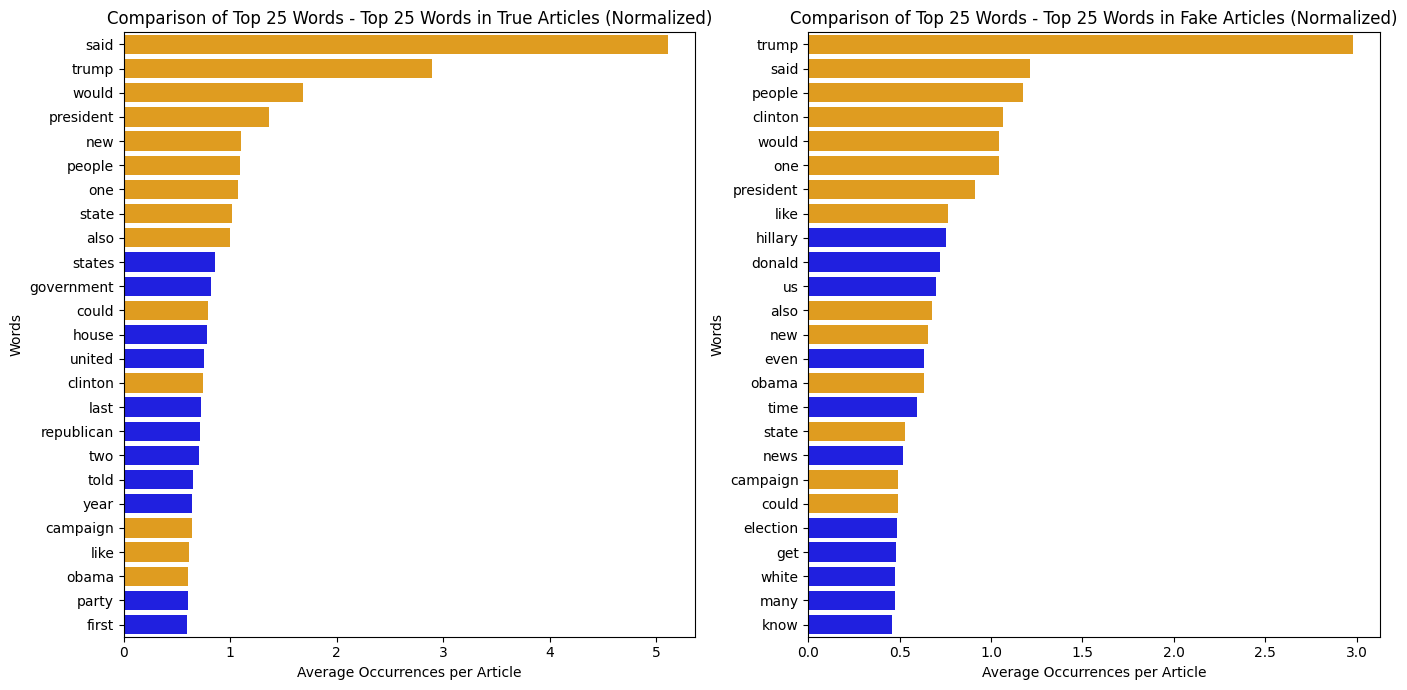

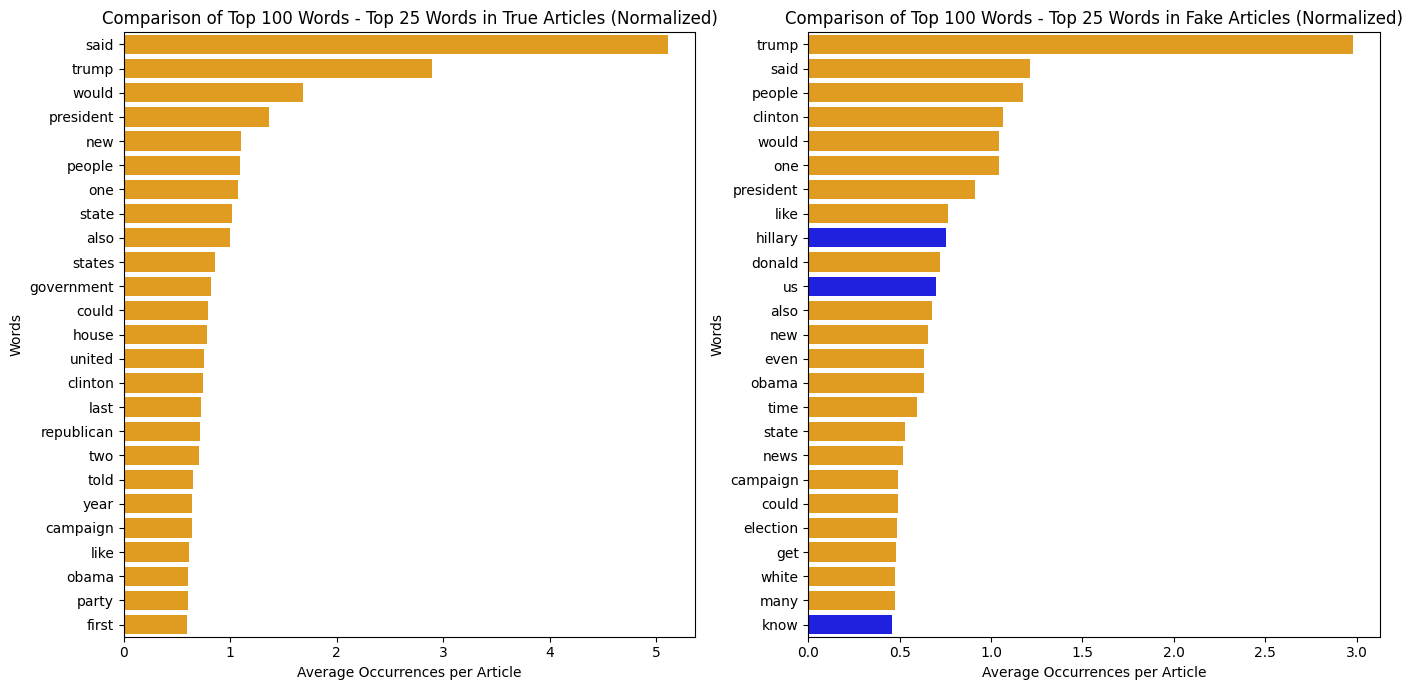

In [124]:
# Separate tokenized words by label then find top 25/top 100. find intersection of sets for overlap and graph
true_words = [word for tokens in combined_data_FT[combined_data_FT['label'] == 0]['text_tokenized_filtered'] for word in tokens]
fake_words = [word for tokens in combined_data_FT[combined_data_FT['label'] == 1]['text_tokenized_filtered'] for word in tokens]

true_word_counts = Counter(true_words)
fake_word_counts = Counter(fake_words)


def graph_common_words(num_depth, base_title):
    true_top_25 = true_word_counts.most_common(num_depth)
    fake_top_25 = fake_word_counts.most_common(num_depth)
    
    true_top_25_dict = dict(true_top_25)
    fake_top_25_dict = dict(fake_top_25)
    
    common_words = set(true_top_25_dict.keys()).intersection(fake_top_25_dict.keys())
    
    def prepare_data_for_plot(top_words, common_words):
        words, counts, colors = [], [], []
        for word, count in top_words:
            words.append(word)
            counts.append(count)
            colors.append('orange' if word in common_words else 'blue')
        return words, counts, colors
    
    # graph by average number of occurances per article
    def average_word_occurrence(word_counts, num_articles):
        return {word: count / num_articles for word, count in word_counts.items()}
    
    true_article_count = len(combined_data_FT[combined_data_FT['label'] == 0])
    fake_article_count = len(combined_data_FT[combined_data_FT['label'] == 1])
    
    true_avg_word_occurrence = average_word_occurrence(true_word_counts, true_article_count)
    fake_avg_word_occurrence = average_word_occurrence(fake_word_counts, fake_article_count)
    
    true_top_25_avg = sorted(true_avg_word_occurrence.items(), key=lambda x: x[1], reverse=True)[:25]
    fake_top_25_avg = sorted(fake_avg_word_occurrence.items(), key=lambda x: x[1], reverse=True)[:25]
    
    true_words_avg, true_counts_avg, true_colors = prepare_data_for_plot(true_top_25_avg, common_words)
    fake_words_avg, fake_counts_avg, fake_colors = prepare_data_for_plot(fake_top_25_avg, common_words)
    
    
    plt.figure(figsize=(14, 7))
    plt.subplot(1, 2, 1)
    sns.barplot(x=true_counts_avg, y=true_words_avg, hue=true_words_avg, palette=true_colors, legend=False)
    plt.title(base_title + ' - Top 25 Words in True Articles (Normalized)')
    plt.xlabel('Average Occurrences per Article')
    plt.ylabel('Words')
    
    plt.subplot(1, 2, 2)
    sns.barplot(x=fake_counts_avg, y=fake_words_avg, hue=fake_words_avg, palette=fake_colors, legend=False)
    plt.title(base_title + ' - Top 25 Words in Fake Articles (Normalized)')
    plt.xlabel('Average Occurrences per Article')
    plt.ylabel('Words')
    plt.tight_layout()
    plt.show()


graph_common_words(25, "Comparison of Top 25 Words")
graph_common_words(100, "Comparison of Top 100 Words")

In [125]:
test_embeddings = np.array([document_embedding(tokens, w2v_model) for tokens in combined_data_FT['text_tokenized_filtered']])

y_true = combined_data_FT['label'].values
y_pred = logistic_model.predict(test_embeddings)

# evaluate
accuracy = accuracy_score(y_true, y_pred)
report = classification_report(y_true, y_pred)

print("Accuracy on the test dataset:", accuracy)
print("\nClassification Report:\n", report)

Accuracy on the test dataset: 0.40989805375347543

Classification Report:
               precision    recall  f1-score   support

           0       0.26      0.09      0.14     26975
           1       0.44      0.73      0.55     26975

    accuracy                           0.41     53950
   macro avg       0.35      0.41      0.34     53950
weighted avg       0.35      0.41      0.34     53950



## Test Dataset Fake vs. True

In [126]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("rajatkumar30/fake-news")

print("Path to dataset files:", path)

Path to dataset files: /Users/skim/.cache/kagglehub/datasets/rajatkumar30/fake-news/versions/1


In [127]:
test_data_path = '/Users/skim/VSCode/DIS Copenhagen/Computational Analysis of Big Data/Final Project/news.csv'
test_data = pd.read_csv(test_data_path)

Had to switch the 1s to be fake and 0s to be true as the new model is above to get accurate metrics. 

In [128]:
test_data.drop(columns=['Unnamed: 0'], inplace=True)  # Drop random column

test_data['label'] = test_data['label'].map({'FAKE': 0, 'REAL': 1})  # again FAKE to 0 and REAL to 1
test_data['label'] = test_data['label'].apply(lambda x: 1 if x == 0 else 0)
test_data.head()

,title,text,label
0,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",1
1,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,1
2,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,0
3,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",1
4,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,0


In [129]:
test_data['text_tokenized'] = test_data['text'].apply(word_tokenize)
test_data['text_tokenized_filtered'] = test_data['text_tokenized'].apply(filter_tokens)
test_data['text_tokenized_filtered'] = test_data['text_tokenized_filtered'].apply( lambda x: [word.lower() for word in x])

In [130]:
test_data.head()

,title,text,label,text_tokenized,text_tokenized_filtered
0,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",1,"[Daniel, Greenfield, ,, a, Shillman, Journalis...","[daniel, greenfield, shillman, journalism, fel..."
1,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,1,"[Google, Pinterest, Digg, Linkedin, Reddit, St...","[google, pinterest, digg, linkedin, reddit, st..."
2,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,0,"[U.S., Secretary, of, State, John, F., Kerry, ...","[secretary, state, john, kerry, said, monday, ..."
3,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",1,"[—, Kaydee, King, (, @, KaydeeKing, ), Novembe...","[kaydee, king, kaydeeking, november, lesson, t..."
4,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,0,"[It, 's, primary, day, in, New, York, and, fro...","[primary, day, new, york, hillary, clinton, do..."


In [131]:
test_embeddings1 = np.array([document_embedding(tokens, w2v_model) for tokens in test_data['text_tokenized_filtered']])

y_true1 = test_data['label'].values
y_pred1 = logistic_model.predict(test_embeddings1)

# evaluate
accuracy = accuracy_score(y_true1, y_pred1)
report = classification_report(y_true1, y_pred1)

print("Accuracy on the test dataset:", accuracy)
print("\nClassification Report:\n", report)

Accuracy on the test dataset: 0.40394632991318075

Classification Report:
               precision    recall  f1-score   support

           0       0.21      0.07      0.11      3171
           1       0.44      0.74      0.55      3164

    accuracy                           0.40      6335
   macro avg       0.33      0.40      0.33      6335
weighted avg       0.33      0.40      0.33      6335



## Original Dataset Fake vs. True

In [132]:
# Download latest version
path = kagglehub.dataset_download("clmentbisaillon/fake-and-real-news-dataset")

print("Path to dataset files:", path)

Path to dataset files: /Users/skim/.cache/kagglehub/datasets/clmentbisaillon/fake-and-real-news-dataset/versions/1


Here I used a mv command in the terminal to move them both to a folder named data

In [133]:
# import fake csv
file_path = '/Users/skim/VSCode/DIS Copenhagen/Computational Analysis of Big Data/Final Project/Fake.csv'
test_fake_data = pd.read_csv(file_path)

In [134]:
# import true csv
true_path = '/Users/skim/VSCode/DIS Copenhagen/Computational Analysis of Big Data/Final Project/True.csv'
test_true_data = pd.read_csv(true_path)

In [135]:
test_fake_data['label'] = 1  # 1 for fake data
test_true_data['label'] = 0  # 0 for true data

test_combined_data = pd.concat([test_fake_data, test_true_data], ignore_index=True)

In [136]:
test_combined_data['text_tokenized'] = test_combined_data['text'].apply(word_tokenize)
test_combined_data['text_tokenized_filtered'] = test_combined_data['text_tokenized'].apply(filter_tokens)
test_combined_data['text_tokenized_filtered'] = test_combined_data['text_tokenized_filtered'].apply( lambda x: [word.lower() for word in x])

In [137]:
test_combined_data.head()

,title,text,subject,date,label,text_tokenized,text_tokenized_filtered
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",1,"[Donald, Trump, just, couldn, t, wish, all, Am...","[donald, trump, wish, americans, happy, new, y..."
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",1,"[House, Intelligence, Committee, Chairman, Dev...","[house, intelligence, committee, chairman, dev..."
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",1,"[On, Friday, ,, it, was, revealed, that, forme...","[friday, revealed, former, milwaukee, sheriff,..."
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",1,"[On, Christmas, day, ,, Donald, Trump, announc...","[christmas, day, donald, trump, announced, wou..."
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",1,"[Pope, Francis, used, his, annual, Christmas, ...","[pope, francis, used, annual, christmas, day, ..."


In [138]:
test_embeddings2 = np.array([document_embedding(tokens, w2v_model) for tokens in test_combined_data['text_tokenized_filtered']])

y_true2 = test_combined_data['label'].values
y_pred2 = logistic_model.predict(test_embeddings2)

# evaluate
accuracy2 = accuracy_score(y_true2, y_pred2)
report2 = classification_report(y_true2, y_pred2)

print("Accuracy on the test dataset:", accuracy2)
print("\nClassification Report:\n", report2)

Accuracy on the test dataset: 0.4238941600962181

Classification Report:
               precision    recall  f1-score   support

           0       0.21      0.07      0.11     21417
           1       0.47      0.74      0.57     23481

    accuracy                           0.42     44898
   macro avg       0.34      0.41      0.34     44898
weighted avg       0.34      0.42      0.35     44898

